In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from glob import glob
from scipy.stats import mannwhitneyu, ttest_ind
from tqdm import tqdm
import numpy as np 
import math
%matplotlib inline

In [6]:
#Reading meta-data files
unis2020 = pd.read_csv('../../data/IPEDS/hd2020.csv',encoding='cp1252')


## Preprocessing meta-data files
### Updating names to match in rankings  
unis2020.loc[unis2020['IALIAS']=='Virginia Tech', 'INSTNM'] = 'Virginia Tech'
unis2020.loc[unis2020['INSTNM']=='University of Illinois Urbana-Champaign', 'INSTNM'] = 'University of Illinois at Urbana-Champaign'
unis2020.loc[(unis2020['INSTNM']=="St. John's College") & (unis2020['STABBR']=='MD'), 'INSTNM'] = "St. John's College - MD"
unis2020.loc[(unis2020['INSTNM']=="St. John's College") & (unis2020['STABBR']=='NM'), 'INSTNM'] = "St. John's College - NM"
unis2020.loc[unis2020['INSTNM']=="William & Mary", 'INSTNM'] = "College of William and Mary"
unis2020.loc[(unis2020['INSTNM']=="Brigham Young University") & (unis2020['CITY']=='Provo'), 'INSTNM'] = "Brigham Young University-Provo"
unis2020.loc[(unis2020['INSTNM']=="The University of the South") & (unis2020['CITY']=='Sewanee'), 'INSTNM'] = "Sewanee - The University of the South"

### Labeling 

# Making sure all institutes are captured in ranking


In [ ]:
unis
unis.iloc[0].index

In [ ]:
data.head()

In [8]:
data2020 = pd.read_csv('../../data/IPEDS/c2020_a.csv')
boolmap2020 = data2020['CIPCODE'].apply(lambda x: x >= 11 and x < 12)
cs2020 = data2020[boolmap2020]
sums2020 = cs2020.groupby('UNITID').sum()
sums2020 = sums2020.reset_index()
sums2020.head()

,UNITID,CIPCODE,MAJORNUM,AWLEVEL,CTOTALT,CTOTALM,CTOTALW,CAIANT,CAIANM,CAIANW,...,CWHITW,C2MORT,C2MORM,C2MORW,CUNKNT,CUNKNM,CUNKNW,CNRALT,CNRALM,CNRALW
0,100654,22.0202,2,12,29,16,13,0,0,0,...,0,0,0,0,4,2,2,3,2,1
1,100663,66.2710,6,49,114,89,25,0,0,0,...,5,2,2,0,1,1,0,28,19,9
2,100706,77.3214,8,63,177,135,42,2,2,0,...,30,1,0,1,6,6,0,25,22,3
3,100724,33.2201,3,17,43,28,15,0,0,0,...,1,0,0,0,0,0,0,3,3,0
4,100751,55.1407,6,39,119,102,17,0,0,0,...,11,6,5,1,0,0,0,15,13,2


In [ ]:
cs2020

In [9]:
# CTOTALW = total women
# CAIANT = total native
# CBKAAT = total black
# CHISPT = hispanic total
columns = ['UNITID', 'CTOTALW', 'CAIANT', 'CBKAAT', 'CHISPT']
filtered = sums2020[columns]
#filtered.columns = ['unitid', 'women', 'native', 'black', 'hispanic']
merged2020 = pd.merge(filtered, unis2020[['UNITID', 'INSTNM']], on = 'UNITID', how='left')
#merged[['un', 'INSTNM', 'women', 'native', 'black', 'hi]
merged2020 = merged2020[['UNITID', 'INSTNM', 'CTOTALW', 'CAIANT', 'CBKAAT', 'CHISPT']]
merged2020.columns = ['unitid', 'name', 'women', 'native', 'black', 'hispanic']
merged2020


,unitid,name,women,native,black,hispanic
0,100654,Alabama A & M University,13,0,21,0
1,100663,University of Alabama at Birmingham,25,0,10,6
2,100706,University of Alabama in Huntsville,42,2,7,3
3,100724,Alabama State University,15,0,39,0
4,100751,The University of Alabama,17,0,6,3
...,...,...,...,...,...,...
2663,494287,EDP University of Puerto Rico-Manati,0,0,0,4
2664,495013,Western Maricopa Education Center,1,0,0,3
2665,495767,The Pennsylvania State University,616,3,105,158
2666,496186,California Institute of Arts & Technology-Nati...,1,0,1,1


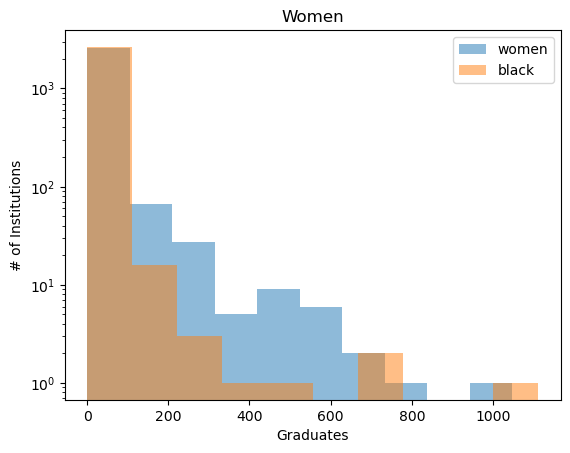

In [10]:
plt.hist(merged2020['women'], label = 'women', alpha = 0.5)
plt.yscale('log')
plt.title('Women')
plt.xlabel('Graduates')
plt.ylabel('# of Institutions')
boolmap_women = merged2020['women']==merged2020['women'].max()
women = merged2020[boolmap_women]
women['name']
plt.hist(merged2020['black'], label = 'black', alpha = 0.5)
plt.legend()



In [ ]:
# now we make the scatter plot
# women and black

plt.scatter(merged2020['women'], merged2020['black'])
plt.yscale('log')
plt.xscale('log')
plt.xlabel('women')
plt.ylabel('black')

In [ ]:
import seaborn as sns
states = pd.merge(merged2020, unis2020[['UNITID', 'STABBR']], left_on= 'unitid', right_on='UNITID', how='left')
#plt.scatter(states['women'], states['black'], c=states['STABBR'])
sns.scatterplot(data = states, x = 'women', y='black', hue = 'STABBR')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('women')
plt.ylabel('black')


In [ ]:
# women and hispanic

plt.scatter(merged2020['women'], merged2020['hispanic'])
plt.yscale('log')
plt.xscale('log')
plt.xlabel('women')
plt.ylabel('hispanic')

In [ ]:
# women and native

plt.scatter(merged2020['women'], merged2020['native'])
plt.yscale('log')
plt.xscale('log')
plt.xlabel('women')
plt.ylabel('native')

In [ ]:
# black and hispanic

plt.scatter(merged2020['black'], merged2020['hispanic'])
plt.yscale('log')
plt.xscale('log')
plt.xlabel('black')
plt.ylabel('hispanic')

In [ ]:
# black and native

plt.scatter(merged2020['black'], merged2020['native'])
plt.yscale('log')
plt.xscale('log')
plt.xlabel('black')
plt.ylabel('native')

In [ ]:
# native and hispanic

plt.scatter(merged2020['native'], merged2020['hispanic'])
plt.yscale('log')
plt.xscale('log')
plt.xlabel('native')
plt.ylabel('hispanic')

In [ ]:
position = pd.merge(merged2020, unis2020[['UNITID', 'LONGITUD', 'LATITUDE']], left_on='unitid', right_on='UNITID', how='left')


In [ ]:
#women
from math import log
plt.figure(figsize = (10, 5))
womenBool = position['women'].apply(lambda x: x > 0)
womenPosition = position[womenBool]
plt.scatter(womenPosition['LONGITUD'], womenPosition['LATITUDE'], c=womenPosition['women'].apply(log), s=20, alpha = 0.5)
plt.ylabel('longitude')
plt.xlabel('latitude')
plt.xlim(-130, -60)
plt.ylim(20, 55)
plt.colorbar()


In [ ]:
blackPosition.sort_values('black', ascending=False)[:20]

In [ ]:
#black

blackBool = position['black'].apply(lambda x: x > 0)
blackPosition = position[blackBool]
plt.figure(figsize = (10, 5))
plt.scatter(blackPosition['LONGITUD'], blackPosition['LATITUDE'], c = blackPosition['black'].apply(log), s = 50, alpha = 0.5)
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.xlim(-130, -60)
plt.ylim(20, 55)
plt.colorbar()

In [ ]:
#hispanic

hispanicBool = position['hispanic'].apply(lambda x: x > 0)
hispanicPosition = position[hispanicBool]
plt.figure(figsize = (10, 5))
plt.scatter(hispanicPosition['LONGITUD'], hispanicPosition['LATITUDE'], c = hispanicPosition['hispanic'].apply(log), s = 50, alpha = 0.5)
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.xlim(-130, -60)
plt.ylim(20, 55)
plt.colorbar()

In [ ]:
#native

nativeBool = position['native'].apply(lambda x: x > 0)
nativePosition = position[nativeBool]
plt.figure(figsize = (10, 5))
plt.scatter(nativePosition['LONGITUD'], nativePosition['LATITUDE'], c = nativePosition['native'].apply(log), s = 50, alpha = 0.5)
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.xlim(-130, -60)
plt.ylim(20, 55)
plt.colorbar()

In [ ]:
final.head()

In [ ]:
final = pd.merge(merged2020, sums2020[['UNITID', 'CTOTALT']], left_on='unitid', right_on='UNITID')
#rawPercentages = final[['women', 'black', 'hispanic', 'native', 'CTOTALT']]
#rawPercentages.columns = ['women', 'black', 'hispanic', 'native', 'total']
final_clean = final.drop('UNITID', axis=1)
# grobj = oneUnitId.groupby(['unitid', 'name'])
final_indexed = final_clean.set_index(['unitid', 'name'])
percentages = final_indexed.apply(lambda x: x / x['CTOTALT'], axis=1)
# percentages = grobj.apply(lambda x: x / grobj['CTOTALT'])
#percentages = final[['women', 'black', 'hispanic', 'native']].apply(lambda x: x / rawPercentages['total'])
#final = final['unitid']
#percentages.head()


In [ ]:
percentages.reset_index()

In [ ]:
percentages.head()

In [ ]:
import seaborn as sns
states = pd.merge(percentages, unis2020[['UNITID', 'STABBR']], left_on= 'unitid', right_on='UNITID', how='left')
#plt.scatter(states['women'], states['black'], c=states['STABBR'])
sns.scatterplot(data = states, x = 'women', y='black', hue = 'STABBR')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('women')
plt.ylabel('black')


In [ ]:

sns.scatterplot(data = states, x = 'women', y='hispanic', hue = 'STABBR')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('women')
plt.ylabel('hispanic')


In [ ]:

sns.scatterplot(data = states, x = 'women', y='native', hue = 'STABBR')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('women')
plt.ylabel('native')


In [ ]:

sns.scatterplot(data = states, x = 'hispanic', y='black', hue = 'STABBR')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('hispanic')
plt.ylabel('black')


In [ ]:

sns.scatterplot(data = states, x = 'native', y='black', hue = 'STABBR')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('native')
plt.ylabel('black')


In [ ]:

sns.scatterplot(data = states, x = 'native', y='hispanic', hue = 'STABBR')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('native')
plt.ylabel('hispanic')


In [ ]:
percentagesPosition = pd.merge(percentages, unis2020[['UNITID', 'LONGITUD', 'LATITUDE']], left_on='unitid', right_on='UNITID', how='left')

In [ ]:
#women
from math import log
plt.figure(figsize = (10, 5))
womenBool = percentagesPosition['women'].apply(lambda x: x > 0)
womenPercentPosition = percentagesPosition[womenBool]
plt.scatter(womenPercentPosition['LONGITUD'], womenPercentPosition['LATITUDE'], c=womenPercentPosition['women'].apply(log), s=20, alpha = 0.5)
plt.ylabel('longitude')
plt.xlabel('latitude')
plt.xlim(-130, -60)
plt.ylim(20, 55)
plt.colorbar()

In [ ]:
#black
from math import log
plt.figure(figsize = (10, 5))
blackBool = percentagesPosition['black'].apply(lambda x: x > 0)
blackPercentPosition = percentagesPosition[blackBool]
plt.scatter(blackPercentPosition['LONGITUD'], blackPercentPosition['LATITUDE'], c=blackPercentPosition['black'].apply(log), s=20, alpha = 0.5)
plt.ylabel('longitude')
plt.xlabel('latitude')
plt.xlim(-130, -60)
plt.ylim(20, 55)
plt.colorbar()

In [ ]:
#hispanic
from math import log
plt.figure(figsize = (10, 5))
hispanicBool = percentagesPosition['hispanic'].apply(lambda x: x > 0)
hispanicPercentPosition = percentagesPosition[hispanicBool]
plt.scatter(hispanicPercentPosition['LONGITUD'], hispanicPercentPosition['LATITUDE'], c=hispanicPercentPosition['hispanic'].apply(log), s=20, alpha = 0.5)
plt.ylabel('longitude')
plt.xlabel('latitude')
plt.xlim(-130, -60)
plt.ylim(20, 55)
plt.colorbar()

In [ ]:
#native
from math import log
plt.figure(figsize = (10, 5))
nativeBool = percentagesPosition['native'].apply(lambda x: x > 0)
nativePercentPosition = percentagesPosition[nativeBool]
plt.scatter(nativePercentPosition['LONGITUD'], nativePercentPosition['LATITUDE'], c=nativePercentPosition['native'].apply(log), s=20, alpha = 0.5)
plt.ylabel('longitude')
plt.xlabel('latitude')
plt.xlim(-130, -60)
plt.ylim(20, 55)
plt.colorbar()

In [ ]:
#Reading meta-data files
unis2015 = pd.read_csv('../data/IPEDS/hd2015.csv',encoding='cp1252')


## Preprocessing meta-data files
### Updating names to match in rankings  
unis2015.loc[unis2015['IALIAS']=='Virginia Tech', 'INSTNM'] = 'Virginia Tech'
unis2015.loc[unis2015['INSTNM']=='University of Illinois Urbana-Champaign', 'INSTNM'] = 'University of Illinois at Urbana-Champaign'
unis2015.loc[(unis2015['INSTNM']=="St. John's College") & (unis2020['STABBR']=='MD'), 'INSTNM'] = "St. John's College - MD"
unis2015.loc[(unis2015['INSTNM']=="St. John's College") & (unis2020['STABBR']=='NM'), 'INSTNM'] = "St. John's College - NM"
unis2015.loc[unis2015['INSTNM']=="William & Mary", 'INSTNM'] = "College of William and Mary"
unis2015.loc[(unis2015['INSTNM']=="Brigham Young University") & (unis2020['CITY']=='Provo'), 'INSTNM'] = "Brigham Young University-Provo"
unis2015.loc[(unis2015['INSTNM']=="The University of the South") & (unis2020['CITY']=='Sewanee'), 'INSTNM'] = "Sewanee - The University of the South"

### Labeling 

# Making sure all institutes are captured in ranking

In [ ]:
data2015 = pd.read_csv('../data/IPEDS/c2015_a.csv')
boolmap2015 = data2015['CIPCODE'].apply(lambda x: x >= 11 and x < 12)
cs2015 = data2015[boolmap2015]
sums2015 = cs2015.groupby('UNITID').sum()
sums2015 = sums2015.reset_index()
sums2015.head()

In [ ]:

filtered2015 = sums2015[columns]
#filtered.columns = ['unitid', 'women', 'native', 'black', 'hispanic']
merged2015 = pd.merge(filtered2015, unis2015[['UNITID', 'INSTNM']], on = 'UNITID', how='left')
#merged[['un', 'INSTNM', 'women', 'native', 'black', 'hi]
merged2015 = merged2015[['UNITID', 'INSTNM', 'CTOTALW', 'CAIANT', 'CBKAAT', 'CHISPT']]
merged2015.columns = ['unitid', 'name', 'women', 'native', 'black', 'hispanic']
merged2015

In [ ]:
final2015 = pd.merge(merged2015, sums2015[['UNITID', 'CTOTALT']], left_on='unitid', right_on='UNITID')
#rawPercentages = final[['women', 'black', 'hispanic', 'native', 'CTOTALT']]
#rawPercentages.columns = ['women', 'black', 'hispanic', 'native', 'total']
final_clean2015 = final2015.drop('UNITID', axis=1)
# grobj = oneUnitId.groupby(['unitid', 'name'])
final_indexed2015 = final_clean2015.set_index(['unitid', 'name'])
percentages2015 = final_indexed2015.apply(lambda x: x / x['CTOTALT'], axis=1)

In [ ]:
percentages2015.head()

In [ ]:
#Reading meta-data files
unis2016 = pd.read_csv('../data/IPEDS/hd2016.csv',encoding='cp1252')


## Preprocessing meta-data files
### Updating names to match in rankings  
unis2016.loc[unis2016['IALIAS']=='Virginia Tech', 'INSTNM'] = 'Virginia Tech'
unis2016.loc[unis2016['INSTNM']=='University of Illinois Urbana-Champaign', 'INSTNM'] = 'University of Illinois at Urbana-Champaign'
unis2016.loc[(unis2016['INSTNM']=="St. John's College") & (unis2020['STABBR']=='MD'), 'INSTNM'] = "St. John's College - MD"
unis2016.loc[(unis2016['INSTNM']=="St. John's College") & (unis2020['STABBR']=='NM'), 'INSTNM'] = "St. John's College - NM"
unis2016.loc[unis2016['INSTNM']=="William & Mary", 'INSTNM'] = "College of William and Mary"
unis2016.loc[(unis2016['INSTNM']=="Brigham Young University") & (unis2020['CITY']=='Provo'), 'INSTNM'] = "Brigham Young University-Provo"
unis2016.loc[(unis2016['INSTNM']=="The University of the South") & (unis2020['CITY']=='Sewanee'), 'INSTNM'] = "Sewanee - The University of the South"

In [ ]:
data2016 = pd.read_csv('../data/IPEDS/c2016_a.csv')
boolmap2016 = data2016['CIPCODE'].apply(lambda x: x >= 11 and x < 12)
cs2016 = data2016[boolmap2016]
sums2016 = cs2016.groupby('UNITID').sum()
sums2016 = sums2016.reset_index()
sums2016.head()

In [ ]:

filtered2016 = sums2016[columns]
#filtered.columns = ['unitid', 'women', 'native', 'black', 'hispanic']
merged2016 = pd.merge(filtered2016, unis2016[['UNITID', 'INSTNM']], on = 'UNITID', how='left')
#merged[['un', 'INSTNM', 'women', 'native', 'black', 'hi]
merged2016 = merged2016[['UNITID', 'INSTNM', 'CTOTALW', 'CAIANT', 'CBKAAT', 'CHISPT']]
merged2016.columns = ['unitid', 'name', 'women', 'native', 'black', 'hispanic']
merged2016

In [ ]:
final2016 = pd.merge(merged2016, sums2016[['UNITID', 'CTOTALT']], left_on='unitid', right_on='UNITID')
#rawPercentages = final[['women', 'black', 'hispanic', 'native', 'CTOTALT']]
#rawPercentages.columns = ['women', 'black', 'hispanic', 'native', 'total']
final_clean2016 = final2016.drop('UNITID', axis=1)
# grobj = oneUnitId.groupby(['unitid', 'name'])
final_indexed2016 = final_clean2016.set_index(['unitid', 'name'])
percentages2016 = final_indexed2016.apply(lambda x: x / x['CTOTALT'], axis=1)

In [ ]:
percentages2016.head()

In [ ]:
#Reading meta-data files
unis2017 = pd.read_csv('../data/IPEDS/hd2017.csv',encoding='cp1252')


## Preprocessing meta-data files
### Updating names to match in rankings  
unis2017.loc[unis2017['IALIAS']=='Virginia Tech', 'INSTNM'] = 'Virginia Tech'
unis2017.loc[unis2017['INSTNM']=='University of Illinois Urbana-Champaign', 'INSTNM'] = 'University of Illinois at Urbana-Champaign'
unis2017.loc[(unis2017['INSTNM']=="St. John's College") & (unis2020['STABBR']=='MD'), 'INSTNM'] = "St. John's College - MD"
unis2017.loc[(unis2017['INSTNM']=="St. John's College") & (unis2020['STABBR']=='NM'), 'INSTNM'] = "St. John's College - NM"
unis2017.loc[unis2017['INSTNM']=="William & Mary", 'INSTNM'] = "College of William and Mary"
unis2017.loc[(unis2017['INSTNM']=="Brigham Young University") & (unis2020['CITY']=='Provo'), 'INSTNM'] = "Brigham Young University-Provo"
unis2017.loc[(unis2017['INSTNM']=="The University of the South") & (unis2020['CITY']=='Sewanee'), 'INSTNM'] = "Sewanee - The University of the South"

In [ ]:
data2017 = pd.read_csv('../data/IPEDS/c2017_a.csv')
boolmap2017 = data2017['CIPCODE'].apply(lambda x: x >= 11 and x < 12)
cs2017 = data2017[boolmap2017]
sums2017 = cs2017.groupby('UNITID').sum()
sums2017 = sums2017.reset_index()
sums2017.head()

In [ ]:

filtered2017 = sums2017[columns]
#filtered.columns = ['unitid', 'women', 'native', 'black', 'hispanic']
merged2017 = pd.merge(filtered2017, unis2017[['UNITID', 'INSTNM']], on = 'UNITID', how='left')
#merged[['un', 'INSTNM', 'women', 'native', 'black', 'hi]
merged2017 = merged2017[['UNITID', 'INSTNM', 'CTOTALW', 'CAIANT', 'CBKAAT', 'CHISPT']]
merged2017.columns = ['unitid', 'name', 'women', 'native', 'black', 'hispanic']
merged2017

In [ ]:
final2017 = pd.merge(merged2017, sums2017[['UNITID', 'CTOTALT']], left_on='unitid', right_on='UNITID')
#rawPercentages = final[['women', 'black', 'hispanic', 'native', 'CTOTALT']]
#rawPercentages.columns = ['women', 'black', 'hispanic', 'native', 'total']
final_clean2017 = final2017.drop('UNITID', axis=1)
# grobj = oneUnitId.groupby(['unitid', 'name'])
final_indexed2017 = final_clean2017.set_index(['unitid', 'name'])
percentages2017 = final_indexed2017.apply(lambda x: x / x['CTOTALT'], axis=1)

In [ ]:
percentages2017.head()

In [ ]:
#Reading meta-data files
unis2018 = pd.read_csv('../data/IPEDS/hd2018.csv',encoding='cp1252')


## Preprocessing meta-data files
### Updating names to match in rankings  
unis2018.loc[unis2018['IALIAS']=='Virginia Tech', 'INSTNM'] = 'Virginia Tech'
unis2018.loc[unis2018['INSTNM']=='University of Illinois Urbana-Champaign', 'INSTNM'] = 'University of Illinois at Urbana-Champaign'
unis2018.loc[(unis2018['INSTNM']=="St. John's College") & (unis2020['STABBR']=='MD'), 'INSTNM'] = "St. John's College - MD"
unis2018.loc[(unis2018['INSTNM']=="St. John's College") & (unis2020['STABBR']=='NM'), 'INSTNM'] = "St. John's College - NM"
unis2018.loc[unis2018['INSTNM']=="William & Mary", 'INSTNM'] = "College of William and Mary"
unis2018.loc[(unis2018['INSTNM']=="Brigham Young University") & (unis2020['CITY']=='Provo'), 'INSTNM'] = "Brigham Young University-Provo"
unis2018.loc[(unis2018['INSTNM']=="The University of the South") & (unis2020['CITY']=='Sewanee'), 'INSTNM'] = "Sewanee - The University of the South"

In [ ]:
data2018 = pd.read_csv('../data/IPEDS/c2018_a.csv')
boolmap2018 = data2018['CIPCODE'].apply(lambda x: x >= 11 and x < 12)
cs2018 = data2018[boolmap2018]
sums2018 = cs2018.groupby('UNITID').sum()
sums2018 = sums2018.reset_index()
sums2018.head()

In [ ]:

filtered2018 = sums2018[columns]
#filtered.columns = ['unitid', 'women', 'native', 'black', 'hispanic']
merged2018 = pd.merge(filtered2018, unis2018[['UNITID', 'INSTNM']], on = 'UNITID', how='left')
#merged[['un', 'INSTNM', 'women', 'native', 'black', 'hi]
merged2018 = merged2018[['UNITID', 'INSTNM', 'CTOTALW', 'CAIANT', 'CBKAAT', 'CHISPT']]
merged2018.columns = ['unitid', 'name', 'women', 'native', 'black', 'hispanic']
merged2018

In [ ]:
final2018 = pd.merge(merged2018, sums2018[['UNITID', 'CTOTALT']], left_on='unitid', right_on='UNITID')
#rawPercentages = final[['women', 'black', 'hispanic', 'native', 'CTOTALT']]
#rawPercentages.columns = ['women', 'black', 'hispanic', 'native', 'total']
final_clean2018 = final2018.drop('UNITID', axis=1)
# grobj = oneUnitId.groupby(['unitid', 'name'])
final_indexed2018 = final_clean2018.set_index(['unitid', 'name'])
percentages2018 = final_indexed2018.apply(lambda x: x / x['CTOTALT'], axis=1)

In [ ]:
percentages2018.head()

In [ ]:
#Reading meta-data files
unis2019 = pd.read_csv('../data/IPEDS/hd2019.csv',encoding='cp1252')


## Preprocessing meta-data files
### Updating names to match in rankings  
unis2019.loc[unis2019['IALIAS']=='Virginia Tech', 'INSTNM'] = 'Virginia Tech'
unis2019.loc[unis2019['INSTNM']=='University of Illinois Urbana-Champaign', 'INSTNM'] = 'University of Illinois at Urbana-Champaign'
unis2019.loc[(unis2019['INSTNM']=="St. John's College") & (unis2020['STABBR']=='MD'), 'INSTNM'] = "St. John's College - MD"
unis2019.loc[(unis2019['INSTNM']=="St. John's College") & (unis2020['STABBR']=='NM'), 'INSTNM'] = "St. John's College - NM"
unis2019.loc[unis2019['INSTNM']=="William & Mary", 'INSTNM'] = "College of William and Mary"
unis2019.loc[(unis2019['INSTNM']=="Brigham Young University") & (unis2020['CITY']=='Provo'), 'INSTNM'] = "Brigham Young University-Provo"
unis2019.loc[(unis2019['INSTNM']=="The University of the South") & (unis2020['CITY']=='Sewanee'), 'INSTNM'] = "Sewanee - The University of the South"

In [ ]:
data2019 = pd.read_csv('../data/IPEDS/c2019_a.csv')
boolmap2019 = data2019['CIPCODE'].apply(lambda x: x >= 11 and x < 12)
cs2019 = data2019[boolmap2019]
sums2019 = cs2019.groupby('UNITID').sum()
sums2019 = sums2019.reset_index()
sums2019.head()

In [ ]:

filtered2019 = sums2019[columns]
#filtered.columns = ['unitid', 'women', 'native', 'black', 'hispanic']
merged2019 = pd.merge(filtered2019, unis2019[['UNITID', 'INSTNM']], on = 'UNITID', how='left')
#merged[['un', 'INSTNM', 'women', 'native', 'black', 'hi]
merged2019 = merged2019[['UNITID', 'INSTNM', 'CTOTALW', 'CAIANT', 'CBKAAT', 'CHISPT']]
merged2019.columns = ['unitid', 'name', 'women', 'native', 'black', 'hispanic']
merged2019

In [ ]:
final2019 = pd.merge(merged2019, sums2019[['UNITID', 'CTOTALT']], left_on='unitid', right_on='UNITID')
#rawPercentages = final[['women', 'black', 'hispanic', 'native', 'CTOTALT']]
#rawPercentages.columns = ['women', 'black', 'hispanic', 'native', 'total']
final_clean2019 = final2019.drop('UNITID', axis=1)
# grobj = oneUnitId.groupby(['unitid', 'name'])
final_indexed2019 = final_clean2019.set_index(['unitid', 'name'])
percentages2019 = final_indexed2019.apply(lambda x: x / x['CTOTALT'], axis=1)

In [639]:
percentages2019.head()

,,women,native,black,hispanic,CTOTALT
unitid,name,,,,,
100654,Alabama A & M University,0.410256,0.000000,0.948718,0.025641,1.0
100663,University of Alabama at Birmingham,0.211538,0.009615,0.096154,0.000000,1.0
100706,University of Alabama in Huntsville,0.216867,0.006024,0.048193,0.024096,1.0
100724,Alabama State University,0.341463,0.000000,0.902439,0.000000,1.0
100751,The University of Alabama,0.180000,0.000000,0.030000,0.020000,1.0


In [ ]:
import seaborn as sns
states2015 = pd.merge(percentages2015, unis2015[['UNITID', 'STABBR']], left_on= 'unitid', right_on='UNITID', how='left')
#plt.scatter(states['women'], states['black'], c=states['STABBR'])
sns.scatterplot(data = states2015, x = 'women', y='black', hue = 'STABBR')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('women')
plt.ylabel('black')

In [ ]:
import seaborn as sns
states2015 = pd.merge(percentages2015, unis2015[['UNITID', 'STABBR']], left_on= 'unitid', right_on='UNITID', how='left')
#plt.scatter(states['women'], states['black'], c=states['STABBR'])
sns.scatterplot(data = states2015, x = 'women', y='hispanic', hue = 'STABBR')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('women')
plt.ylabel('hispanic')

In [ ]:
import seaborn as sns
states2015 = pd.merge(percentages2015, unis2015[['UNITID', 'STABBR']], left_on= 'unitid', right_on='UNITID', how='left')
#plt.scatter(states['women'], states['black'], c=states['STABBR'])
sns.scatterplot(data = states2015, x = 'women', y='native', hue = 'STABBR')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('women')
plt.ylabel('native')

In [ ]:
import seaborn as sns
states2015 = pd.merge(percentages2015, unis2015[['UNITID', 'STABBR']], left_on= 'unitid', right_on='UNITID', how='left')
#plt.scatter(states['women'], states['black'], c=states['STABBR'])
sns.scatterplot(data = states2015, x = 'hispanic', y='black', hue = 'STABBR')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('hispanic')
plt.ylabel('black')

In [ ]:
import seaborn as sns
states2015 = pd.merge(percentages2015, unis2015[['UNITID', 'STABBR']], left_on= 'unitid', right_on='UNITID', how='left')
#plt.scatter(states['women'], states['black'], c=states['STABBR'])
sns.scatterplot(data = states2015, x = 'native', y='black', hue = 'STABBR')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('native')
plt.ylabel('black')

In [ ]:
import seaborn as sns
states2015 = pd.merge(percentages2015, unis2015[['UNITID', 'STABBR']], left_on= 'unitid', right_on='UNITID', how='left')
#plt.scatter(states['women'], states['black'], c=states['STABBR'])
sns.scatterplot(data = states2015, x = 'hispanic', y='native', hue = 'STABBR')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('hispanic')
plt.ylabel('native')

In [ ]:
import seaborn as sns
states2016 = pd.merge(percentages2016, unis2016[['UNITID', 'STABBR']], left_on= 'unitid', right_on='UNITID', how='left')
#plt.scatter(states['women'], states['black'], c=states['STABBR'])
sns.scatterplot(data = states2016, x = 'women', y='black', hue = 'STABBR')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('women')
plt.ylabel('black')

In [ ]:
import seaborn as sns
states2016 = pd.merge(percentages2016, unis2016[['UNITID', 'STABBR']], left_on= 'unitid', right_on='UNITID', how='left')
#plt.scatter(states['women'], states['black'], c=states['STABBR'])
sns.scatterplot(data = states2016, x = 'women', y='hispanic', hue = 'STABBR')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('women')
plt.ylabel('hispanic')

In [ ]:
import seaborn as sns
states2016 = pd.merge(percentages2016, unis2016[['UNITID', 'STABBR']], left_on= 'unitid', right_on='UNITID', how='left')
#plt.scatter(states['women'], states['black'], c=states['STABBR'])
sns.scatterplot(data = states2016, x = 'women', y='native', hue = 'STABBR')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('women')
plt.ylabel('native')

In [ ]:
import seaborn as sns
states2016 = pd.merge(percentages2016, unis2016[['UNITID', 'STABBR']], left_on= 'unitid', right_on='UNITID', how='left')
#plt.scatter(states['women'], states['black'], c=states['STABBR'])
sns.scatterplot(data = states2016, x = 'hispanic', y='black', hue = 'STABBR')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('hispanic')
plt.ylabel('black')

In [ ]:
import seaborn as sns
states2016 = pd.merge(percentages2016, unis2016[['UNITID', 'STABBR']], left_on= 'unitid', right_on='UNITID', how='left')
#plt.scatter(states['women'], states['black'], c=states['STABBR'])
sns.scatterplot(data = states2016, x = 'native', y='black', hue = 'STABBR')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('native')
plt.ylabel('black')

In [ ]:
import seaborn as sns
states2016 = pd.merge(percentages2016, unis2016[['UNITID', 'STABBR']], left_on= 'unitid', right_on='UNITID', how='left')
#plt.scatter(states['women'], states['black'], c=states['STABBR'])
sns.scatterplot(data = states2016, x = 'native', y='hispanic', hue = 'STABBR')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('native')
plt.ylabel('hispanic')

In [ ]:
import seaborn as sns
states2017 = pd.merge(percentages2017, unis2017[['UNITID', 'STABBR']], left_on= 'unitid', right_on='UNITID', how='left')
#plt.scatter(states['women'], states['black'], c=states['STABBR'])
sns.scatterplot(data = states2017, x = 'women', y='black', hue = 'STABBR')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('women')
plt.ylabel('black')

In [ ]:
import seaborn as sns
states2017 = pd.merge(percentages2017, unis2017[['UNITID', 'STABBR']], left_on= 'unitid', right_on='UNITID', how='left')
#plt.scatter(states['women'], states['black'], c=states['STABBR'])
sns.scatterplot(data = states2017, x = 'women', y='hispanic', hue = 'STABBR')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('women')
plt.ylabel('hispanic')

In [ ]:
import seaborn as sns
states2017 = pd.merge(percentages2017, unis2017[['UNITID', 'STABBR']], left_on= 'unitid', right_on='UNITID', how='left')
#plt.scatter(states['women'], states['black'], c=states['STABBR'])
sns.scatterplot(data = states2017, x = 'women', y='native', hue = 'STABBR')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('women')
plt.ylabel('native')

In [ ]:
import seaborn as sns
states2017 = pd.merge(percentages2017, unis2017[['UNITID', 'STABBR']], left_on= 'unitid', right_on='UNITID', how='left')
#plt.scatter(states['women'], states['black'], c=states['STABBR'])
sns.scatterplot(data = states2017, x = 'hispanic', y='black', hue = 'STABBR')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('hispanic')
plt.ylabel('black')

In [ ]:
import seaborn as sns
states2017 = pd.merge(percentages2017, unis2017[['UNITID', 'STABBR']], left_on= 'unitid', right_on='UNITID', how='left')
#plt.scatter(states['women'], states['black'], c=states['STABBR'])
sns.scatterplot(data = states2017, x = 'native', y='black', hue = 'STABBR')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('native')
plt.ylabel('black')

In [ ]:
import seaborn as sns
states2017 = pd.merge(percentages2017, unis2017[['UNITID', 'STABBR']], left_on= 'unitid', right_on='UNITID', how='left')
#plt.scatter(states['women'], states['black'], c=states['STABBR'])
sns.scatterplot(data = states2017, x = 'native', y='hispanic', hue = 'STABBR')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('native')
plt.ylabel('hispanic')

In [ ]:
import seaborn as sns
states2018 = pd.merge(percentages2018, unis2018[['UNITID', 'STABBR']], left_on= 'unitid', right_on='UNITID', how='left')
#plt.scatter(states['women'], states['black'], c=states['STABBR'])
sns.scatterplot(data = states2018, x = 'women', y='black', hue = 'STABBR')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('women')
plt.ylabel('black')

In [ ]:
import seaborn as sns
states2018 = pd.merge(percentages2018, unis2018[['UNITID', 'STABBR']], left_on= 'unitid', right_on='UNITID', how='left')
#plt.scatter(states['women'], states['black'], c=states['STABBR'])
sns.scatterplot(data = states2018, x = 'women', y='hispanic', hue = 'STABBR')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('women')
plt.ylabel('hispanic')

In [ ]:
import seaborn as sns
states2018 = pd.merge(percentages2018, unis2018[['UNITID', 'STABBR']], left_on= 'unitid', right_on='UNITID', how='left')
#plt.scatter(states['women'], states['black'], c=states['STABBR'])
sns.scatterplot(data = states2018, x = 'women', y='native', hue = 'STABBR')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('women')
plt.ylabel('native')

In [ ]:
import seaborn as sns
states2018 = pd.merge(percentages2018, unis2018[['UNITID', 'STABBR']], left_on= 'unitid', right_on='UNITID', how='left')
#plt.scatter(states['women'], states['black'], c=states['STABBR'])
sns.scatterplot(data = states2018, x = 'hispanic', y='black', hue = 'STABBR')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('hispanic')
plt.ylabel('black')

In [ ]:
import seaborn as sns
states2018 = pd.merge(percentages2018, unis2018[['UNITID', 'STABBR']], left_on= 'unitid', right_on='UNITID', how='left')
#plt.scatter(states['women'], states['black'], c=states['STABBR'])
sns.scatterplot(data = states2018, x = 'native', y='black', hue = 'STABBR')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('native')
plt.ylabel('black')

In [ ]:
import seaborn as sns
states2018 = pd.merge(percentages2018, unis2018[['UNITID', 'STABBR']], left_on= 'unitid', right_on='UNITID', how='left')
#plt.scatter(states['women'], states['black'], c=states['STABBR'])
sns.scatterplot(data = states2018, x = 'native', y='hispanic', hue = 'STABBR')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('native')
plt.ylabel('hispanic')

In [ ]:
import seaborn as sns
states2019 = pd.merge(percentages2019, unis2019[['UNITID', 'STABBR']], left_on= 'unitid', right_on='UNITID', how='left')
#plt.scatter(states['women'], states['black'], c=states['STABBR'])
sns.scatterplot(data = states2019, x = 'women', y='black', hue = 'STABBR')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('women')
plt.ylabel('black')

In [ ]:
import seaborn as sns
states2019 = pd.merge(percentages2019, unis2019[['UNITID', 'STABBR']], left_on= 'unitid', right_on='UNITID', how='left')
#plt.scatter(states['women'], states['black'], c=states['STABBR'])
sns.scatterplot(data = states2019, x = 'women', y='hispanic', hue = 'STABBR')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('women')
plt.ylabel('hispanic')

In [ ]:
import seaborn as sns
states2019 = pd.merge(percentages2019, unis2019[['UNITID', 'STABBR']], left_on= 'unitid', right_on='UNITID', how='left')
#plt.scatter(states['women'], states['black'], c=states['STABBR'])
sns.scatterplot(data = states2019, x = 'women', y='native', hue = 'STABBR')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('women')
plt.ylabel('native')

In [ ]:
import seaborn as sns
states2019 = pd.merge(percentages2019, unis2019[['UNITID', 'STABBR']], left_on= 'unitid', right_on='UNITID', how='left')
#plt.scatter(states['women'], states['black'], c=states['STABBR'])
sns.scatterplot(data = states2019, x = 'hispanic', y='black', hue = 'STABBR')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('hispanic')
plt.ylabel('black')

In [ ]:
import seaborn as sns
states2019 = pd.merge(percentages2019, unis2019[['UNITID', 'STABBR']], left_on= 'unitid', right_on='UNITID', how='left')
#plt.scatter(states['women'], states['black'], c=states['STABBR'])
sns.scatterplot(data = states2019, x = 'native', y='black', hue = 'STABBR')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('native')
plt.ylabel('black')

In [ ]:
import seaborn as sns
states2019 = pd.merge(percentages2019, unis2019[['UNITID', 'STABBR']], left_on= 'unitid', right_on='UNITID', how='left')
#plt.scatter(states['women'], states['black'], c=states['STABBR'])
sns.scatterplot(data = states2019, x = 'native', y='hispanic', hue = 'STABBR')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('native')
plt.ylabel('hispanic')

In [ ]:
percentagesPosition2015 = pd.merge(percentages2015, unis2015[['UNITID', 'LONGITUD', 'LATITUDE']], left_on='unitid', right_on='UNITID', how='left')

In [ ]:
percentagesPosition2015.head()

In [ ]:
percentagesPosition2016 = pd.merge(percentages2016, unis2016[['UNITID', 'LONGITUD', 'LATITUDE']], left_on='unitid', right_on='UNITID', how='left')

In [ ]:
percentagesPosition2017 = pd.merge(percentages2017, unis2017[['UNITID', 'LONGITUD', 'LATITUDE']], left_on='unitid', right_on='UNITID', how='left')

In [ ]:
percentagesPosition2018 = pd.merge(percentages2018, unis2018[['UNITID', 'LONGITUD', 'LATITUDE']], left_on='unitid', right_on='UNITID', how='left')

In [ ]:
percentagesPosition2019 = pd.merge(percentages2019, unis2019[['UNITID', 'LONGITUD', 'LATITUDE']], left_on='unitid', right_on='UNITID', how='left')

In [ ]:
percentagesPosition2015.dtypes

In [ ]:
percentagesPosition2015['LONGITUD'] = percentagesPosition2015['LONGITUD'].astype(float)
percentagesPosition2015['LATITUDE'] = percentagesPosition2015['LATITUDE'].astype(float)

plt.scatter(percentagesPosition2015['LONGITUD'], percentagesPosition2015['LATITUDE'])
plt.xlim(-160, -40)
plt.ylim(-10)

In [ ]:
plt.figure(figsize = (10, 5))
womenBool2015 = percentagesPosition2015['women'].apply(lambda x: x > 0)
womenPercentPosition2015 = percentagesPosition2015[womenBool2015]
plt.scatter(womenPercentPosition2015['LONGITUD'], womenPercentPosition2015['LATITUDE'], c=womenPercentPosition2015['women'].apply(log), s=20, alpha = 0.5)
plt.ylabel('longitude')
plt.xlabel('latitude')
plt.colorbar()
plt.title("Women Percentages 2015")

In [ ]:
plt.figure(figsize = (10, 5))
blackBool2015 = percentagesPosition2015['black'].apply(lambda x: x > 0)
blackPercentPosition2015 = percentagesPosition2015[blackBool2015]
plt.scatter(blackPercentPosition2015['LONGITUD'], blackPercentPosition2015['LATITUDE'], c=blackPercentPosition2015['black'].apply(log), s=20, alpha = 0.5)
plt.ylabel('longitude')
plt.xlabel('latitude')
plt.xlim(-130, -60)
plt.ylim(20, 55)
plt.colorbar()
plt.title("Black Percentages 2015")

In [ ]:
plt.figure(figsize = (10, 5))
hispanicBool2015 = percentagesPosition2015['hispanic'].apply(lambda x: x > 0)
hispanicPercentPosition2015 = percentagesPosition2015[hispanicBool2015]
plt.scatter(hispanicPercentPosition2015['LONGITUD'], hispanicPercentPosition2015['LATITUDE'], c=hispanicPercentPosition2015['hispanic'].apply(log), s=20, alpha = 0.5)
plt.ylabel('longitude')
plt.xlabel('latitude')
plt.xlim(-130, -60)
plt.ylim(20, 55)
plt.colorbar()
plt.title("Hispanic Percentages 2015")

In [ ]:
plt.figure(figsize = (10, 5))
nativeBool2015 = percentagesPosition2015['native'].apply(lambda x: x > 0)
nativePercentPosition2015 = percentagesPosition2015[nativeBool2015]
plt.scatter(nativePercentPosition2015['LONGITUD'], nativePercentPosition2015['LATITUDE'], c=nativePercentPosition2015['native'].apply(log), s=20, alpha = 0.5)
plt.ylabel('longitude')
plt.xlabel('latitude')
plt.xlim(-130, -60)
plt.ylim(20, 55)
plt.colorbar()
plt.title("Native Percentages 2015")

In [ ]:
plt.figure(figsize = (10, 5))
womenBool2016 = percentagesPosition2016['women'].apply(lambda x: x > 0)
womenPercentPosition2016 = percentagesPosition2016[womenBool2016]
plt.scatter(womenPercentPosition2016['LONGITUD'], womenPercentPosition2016['LATITUDE'], c=womenPercentPosition2016['women'].apply(log), s=20, alpha = 0.5)
plt.ylabel('longitude')
plt.xlabel('latitude')
plt.xlim(-130, -60)
plt.ylim(20, 55)
plt.colorbar()
plt.title("Women Percentages 2016")

In [ ]:
plt.figure(figsize = (10, 5))
blackBool2016 = percentagesPosition2016['black'].apply(lambda x: x > 0)
blackPercentPosition2016 = percentagesPosition2016[blackBool2016]
plt.scatter(blackPercentPosition2016['LONGITUD'], blackPercentPosition2016['LATITUDE'], c=blackPercentPosition2016['black'].apply(log), s=20, alpha = 0.5)
plt.ylabel('longitude')
plt.xlabel('latitude')
plt.xlim(-130, -60)
plt.ylim(20, 55)
plt.colorbar()
plt.title("Black Percentages 2016")

In [ ]:
plt.figure(figsize = (10, 5))
hispanicBool2016 = percentagesPosition2016['hispanic'].apply(lambda x: x > 0)
hispanicPercentPosition2016 = percentagesPosition2016[hispanicBool2016]
plt.scatter(hispanicPercentPosition2016['LONGITUD'], hispanicPercentPosition2016['LATITUDE'], c=hispanicPercentPosition2016['hispanic'].apply(log), s=20, alpha = 0.5)
plt.ylabel('longitude')
plt.xlabel('latitude')
plt.xlim(-130, -60)
plt.ylim(20, 55)
plt.colorbar()
plt.title("Hispanic Percentages 2016")

In [ ]:
plt.figure(figsize = (10, 5))
nativeBool2016 = percentagesPosition2016['native'].apply(lambda x: x > 0)
nativePercentPosition2016 = percentagesPosition2016[nativeBool2016]
plt.scatter(nativePercentPosition2016['LONGITUD'], nativePercentPosition2016['LATITUDE'], c=nativePercentPosition2016['native'].apply(log), s=20, alpha = 0.5)
plt.ylabel('longitude')
plt.xlabel('latitude')
plt.xlim(-130, -60)
plt.ylim(20, 55)
plt.colorbar()
plt.title("Native Percentages 2016")

In [ ]:
plt.figure(figsize = (10, 5))
womenBool2017 = percentagesPosition2017['women'].apply(lambda x: x > 0)
womenPercentPosition2017 = percentagesPosition2017[womenBool2017]
plt.scatter(womenPercentPosition2017['LONGITUD'], womenPercentPosition2017['LATITUDE'], c=womenPercentPosition2017['women'].apply(log), s=20, alpha = 0.5)
plt.ylabel('longitude')
plt.xlabel('latitude')
plt.xlim(-130, -60)
plt.ylim(20, 55)
plt.colorbar()
plt.title("Women Percentages 2017")

In [ ]:
plt.figure(figsize = (10, 5))
blackBool2017 = percentagesPosition2017['black'].apply(lambda x: x > 0)
blackPercentPosition2017 = percentagesPosition2017[blackBool2017]
plt.scatter(blackPercentPosition2017['LONGITUD'], blackPercentPosition2017['LATITUDE'], c=blackPercentPosition2017['black'].apply(log), s=20, alpha = 0.5)
plt.ylabel('longitude')
plt.xlabel('latitude')
plt.xlim(-130, -60)
plt.ylim(20, 55)
plt.colorbar()
plt.title("Black Percentages 2017")

In [ ]:
plt.figure(figsize = (10, 5))
hispanicBool2017 = percentagesPosition2017['hispanic'].apply(lambda x: x > 0)
hispanicPercentPosition2017 = percentagesPosition2017[hispanicBool2017]
plt.scatter(hispanicPercentPosition2017['LONGITUD'], hispanicPercentPosition2017['LATITUDE'], c=hispanicPercentPosition2017['hispanic'].apply(log), s=20, alpha = 0.5)
plt.ylabel('longitude')
plt.xlabel('latitude')
plt.xlim(-130, -60)
plt.ylim(20, 55)
plt.colorbar()
plt.title("Hispanic Percentages 2017")

In [ ]:
plt.figure(figsize = (10, 5))
nativeBool2017 = percentagesPosition2017['native'].apply(lambda x: x > 0)
nativePercentPosition2017 = percentagesPosition2017[nativeBool2017]
plt.scatter(nativePercentPosition2017['LONGITUD'], nativePercentPosition2017['LATITUDE'], c=nativePercentPosition2017['native'].apply(log), s=20, alpha = 0.5)
plt.ylabel('longitude')
plt.xlabel('latitude')
plt.xlim(-130, -60)
plt.ylim(20, 55)
plt.colorbar()
plt.title("Native Percentages 2017")

In [ ]:
plt.figure(figsize = (10, 5))
womenBool2018 = percentagesPosition2018['women'].apply(lambda x: x > 0)
womenPercentPosition2018 = percentagesPosition2018[womenBool2018]
plt.scatter(womenPercentPosition2018['LONGITUD'], womenPercentPosition2018['LATITUDE'], c=womenPercentPosition2018['women'].apply(log), s=20, alpha = 0.5)
plt.ylabel('longitude')
plt.xlabel('latitude')
plt.xlim(-130, -60)
plt.ylim(20, 55)
plt.colorbar()
plt.title("Women Percentages 2018")

In [ ]:
plt.figure(figsize = (10, 5))
blackBool2018 = percentagesPosition2018['black'].apply(lambda x: x > 0)
blackPercentPosition2018 = percentagesPosition2018[blackBool2018]
plt.scatter(blackPercentPosition2018['LONGITUD'], blackPercentPosition2018['LATITUDE'], c=blackPercentPosition2018['black'].apply(log), s=20, alpha = 0.5)
plt.ylabel('longitude')
plt.xlabel('latitude')
plt.xlim(-130, -60)
plt.ylim(20, 55)
plt.colorbar()
plt.title("Black Percentages 2018")

In [ ]:
plt.figure(figsize = (10, 5))
hispanicBool2018 = percentagesPosition2018['hispanic'].apply(lambda x: x > 0)
hispanicPercentPosition2018 = percentagesPosition2018[hispanicBool2018]
plt.scatter(hispanicPercentPosition2018['LONGITUD'], hispanicPercentPosition2018['LATITUDE'], c=hispanicPercentPosition2018['hispanic'].apply(log), s=20, alpha = 0.5)
plt.ylabel('longitude')
plt.xlabel('latitude')
plt.xlim(-130, -60)
plt.ylim(20, 55)
plt.colorbar()
plt.title("Hispanic Percentages 2018")

In [ ]:
plt.figure(figsize = (10, 5))
nativeBool2018 = percentagesPosition2018['native'].apply(lambda x: x > 0)
nativePercentPosition2018 = percentagesPosition2018[nativeBool2018]
plt.scatter(nativePercentPosition2018['LONGITUD'], nativePercentPosition2018['LATITUDE'], c=nativePercentPosition2018['native'].apply(log), s=20, alpha = 0.5)
plt.ylabel('longitude')
plt.xlabel('latitude')
plt.xlim(-130, -60)
plt.ylim(20, 55)
plt.colorbar()
plt.title("Native Percentages 2018")

In [ ]:
plt.figure(figsize = (10, 5))
womenBool2019 = percentagesPosition2019['women'].apply(lambda x: x > 0)
womenPercentPosition2019 = percentagesPosition2019[womenBool2019]
plt.scatter(womenPercentPosition2019['LONGITUD'], womenPercentPosition2019['LATITUDE'], c=womenPercentPosition2019['women'].apply(log), s=20, alpha = 0.5)
plt.ylabel('longitude')
plt.xlabel('latitude')
plt.xlim(-130, -60)
plt.ylim(20, 55)
plt.colorbar()
plt.title("Women Percentages 2019")

In [ ]:
plt.figure(figsize = (10, 5))
blackBool2019 = percentagesPosition2019['black'].apply(lambda x: x > 0)
blackPercentPosition2019 = percentagesPosition2019[blackBool2019]
plt.scatter(blackPercentPosition2019['LONGITUD'], blackPercentPosition2019['LATITUDE'], c=blackPercentPosition2019['black'].apply(log), s=20, alpha = 0.5)
plt.ylabel('longitude')
plt.xlabel('latitude')
plt.xlim(-130, -60)
plt.ylim(20, 55)
plt.colorbar()
plt.title("Black Percentages 2019")

In [ ]:
plt.figure(figsize = (10, 5))
hispanicBool2019 = percentagesPosition2019['hispanic'].apply(lambda x: x > 0)
hispanicPercentPosition2019 = percentagesPosition2019[hispanicBool2019]
plt.scatter(hispanicPercentPosition2019['LONGITUD'], hispanicPercentPosition2019['LATITUDE'], c=hispanicPercentPosition2019['hispanic'].apply(log), s=20, alpha = 0.5)
plt.ylabel('longitude')
plt.xlabel('latitude')
plt.xlim(-130, -60)
plt.ylim(20, 55)
plt.colorbar()
plt.title("Hispanic Percentages 2019")

In [ ]:
plt.figure(figsize = (10, 5))
nativeBool2019 = percentagesPosition2019['native'].apply(lambda x: x > 0)
nativePercentPosition2019 = percentagesPosition2019[nativeBool2019]
plt.scatter(nativePercentPosition2019['LONGITUD'], nativePercentPosition2019['LATITUDE'], c=nativePercentPosition2019['native'].apply(log), s=20, alpha = 0.5)
plt.ylabel('longitude')
plt.xlabel('latitude')
plt.xlim(-130, -60)
plt.ylim(20, 55)
plt.colorbar()
plt.title("Native Percentages 2019")

In [ ]:
df_dict = {'2015': (unis2015, sums2015), '2016': (unis2016, sums2016), '2017': (unis2017, sums2017), '2018': (unis2018, sums2018), '2019': (unis2019, sums2019), '2020': (unis2020, sums2020)}

In [ ]:
def stateTotalsWomen(sums, unis):
    columns = ['UNITID', 'CTOTALW', 'CAIANT', 'CBKAAT', 'CHISPT', 'CTOTALT']
    filtered = sums[columns]
    #filtered.columns = ['unitid', 'women', 'native', 'black', 'hispanic']
    statesAndUnis = pd.merge(filtered, unis[['UNITID', 'INSTNM', 'STABBR']], on = 'UNITID', how='left')
    statesTotals = statesAndUnis.groupby('STABBR').sum()
    sns.scatterplot(data = states2019, x = 'STABBR', y='women', hue = 'STABBR')
    plt.yscale('log')
    plt.xlabel('States')
    plt.ylabel('Women') 



In [ ]:
sums2015.head()

In [ ]:
for year in df_dict:
    unis, sums = df_dict[year]
    stateTotalsWomen(sums, unis)
    plt.figure()
    

In [3]:
import pandas as pd
all_unis = {}
all_completions = {}
def process_unis():
    unis = pd.read_csv('../../data/IPEDS/university_info/hd2021.csv', encoding='cp1252')
    ## Preprocessing meta-data files
    ### Updating names to match in rankings  
    unis.loc[unis['IALIAS']=='Virginia Tech', 'INSTNM'] = 'Virginia Tech'
    unis.loc[unis['INSTNM']=='University of Illinois Urbana-Champaign', 'INSTNM'] = 'University of Illinois at Urbana-Champaign'
    unis.loc[(unis['INSTNM']=="St. John's College") & (unis['STABBR']=='MD'), 'INSTNM'] = "St. John's College - MD"
    unis.loc[(unis['INSTNM']=="St. John's College") & (unis['STABBR']=='NM'), 'INSTNM'] = "St. John's College - NM"
    unis.loc[unis['INSTNM']=="William & Mary", 'INSTNM'] = "College of William and Mary"
    unis.loc[(unis['INSTNM']=="Brigham Young University") & (unis['CITY']=='Provo'), 'INSTNM'] = "Brigham Young University-Provo"
    unis.loc[(unis['INSTNM']=="The University of the South") & (unis['CITY']=='Sewanee'), 'INSTNM'] = "Sewanee - The University of the South"
    unis.loc[(unis['OBEREG'] == -3), 'OBEREG'] = 10
        
    return unis

def process_completions(year):
    completions = pd.read_csv('../../data/IPEDS/completions/c%s_a.csv' % year)
    return completions
# hard coded it because of assignment errors
for year in range(2008, 2022):
    all_unis[year] = process_unis()
    all_completions[year] = process_completions(year)

In [814]:
all_unis[2008].columns

Index(['UNITID', 'INSTNM', 'IALIAS', 'ADDR', 'CITY', 'STABBR', 'ZIP', 'FIPS',
       'OBEREG', 'CHFNM', 'CHFTITLE', 'GENTELE', 'EIN', 'DUNS', 'OPEID',
       'OPEFLAG', 'WEBADDR', 'ADMINURL', 'FAIDURL', 'APPLURL', 'NPRICURL',
       'VETURL', 'ATHURL', 'DISAURL', 'SECTOR', 'ICLEVEL', 'CONTROL',
       'HLOFFER', 'UGOFFER', 'GROFFER', 'HDEGOFR1', 'DEGGRANT', 'HBCU',
       'HOSPITAL', 'MEDICAL', 'TRIBAL', 'LOCALE', 'OPENPUBL', 'ACT', 'NEWID',
       'DEATHYR', 'CLOSEDAT', 'CYACTIVE', 'POSTSEC', 'PSEFLAG', 'PSET4FLG',
       'RPTMTH', 'INSTCAT', 'C21BASIC', 'C21IPUG', 'C21IPGRD', 'C21UGPRF',
       'C21ENPRF', 'C21SZSET', 'C18BASIC', 'C15BASIC', 'CCBASIC', 'CARNEGIE',
       'LANDGRNT', 'INSTSIZE', 'F1SYSTYP', 'F1SYSNAM', 'F1SYSCOD', 'CBSA',
       'CBSATYPE', 'CSA', 'NECTA', 'COUNTYCD', 'COUNTYNM', 'CNGDSTCD',
       'LONGITUD', 'LATITUDE', 'DFRCGID', 'DFRCUSCG'],
      dtype='object')

In [4]:
reg_code_to_label = {0: 'US Service Schools', 1: 'New England', 2: 'Mid East', 3: 'Great Lakes', 4: 'Plains', 5: 'Southeast', 6: 'Southwest', 7: 'Rocky Mountains',\
    8: 'Far West', 9: 'Outlying Areas'}

#df['OBEREG'] = df['OBEREG'].apply(lambda x: reg_code_to_label[x])

In [5]:
def region_processing(uni_data, completion_data, region):
    uni_boolmap = uni_data['OBEREG'] == region
    region_unis = uni_data[uni_boolmap]
    unitids = set(region_unis['UNITID'])
    completion_boolmap = completion_data['UNITID'].apply(lambda x: x in unitids)
    region_data = completion_data[completion_boolmap]
    return region_data, region_unis
region_processing(all_unis[2020], all_completions[2020], 0)
        

(        UNITID  CIPCODE  MAJORNUM  AWLEVEL XCTOTALT  CTOTALT XCTOTALM  \
 26539   119678  11.0101         1        7        R        0        R   
 26540   119678  11.0101         1       17        R        0        R   
 26541   119678  11.0103         1        6        R        0        R   
 26542   119678  11.0103         1        7        R       13        R   
 26543   119678  11.0701         1        7        R       38        R   
 ...        ...      ...       ...      ...      ...      ...      ...   
 176353  200697  52.0205         1        7        R        0        R   
 176354  200697  52.1301         1        6        R       10        R   
 176355  200697  99.0000         1        6        R      146        R   
 176356  200697  99.0000         1        7        R      253        R   
 176357  200697  99.0000         1       17        R       27        R   
 
         CTOTALM XCTOTALW  CTOTALW  ... XCUNKNM  CUNKNM XCUNKNW  CUNKNW  \
 26539         0        R        0 

In [6]:
# data is the dataframe already boolmapped with the proper data
def groupTotals(years):
    allStateCsData  = []
    allStateNonCsData = []
    for year in years:
        data, unis = years[year]
        csMerge, nonCsMerge = csVsNonCs(data, unis)
        stateCsTotal = csMerge.groupby('STABBR').sum().reset_index()
        stateNonCsTotal = nonCsMerge.groupby('STABBR').sum().reset_index()
        stateCsTotal['year'] = year
        stateNonCsTotal['year'] = year
        allStateCsData.append(stateCsTotal)
        allStateNonCsData.append(stateNonCsTotal)
    allStateCsData = pd.concat(allStateCsData)
    allStateNonCsData = pd.concat(allStateNonCsData)
    return allStateCsData, allStateNonCsData
    
        
        
def csVsNonCs(data, unis):
    csBoolmap = data['CIPCODE'].apply(lambda x : x < 12 and x >= 11)
    cs = data[csBoolmap]
    csSum = cs.groupby('UNITID').sum()
    csSum = csSum.reset_index()
    uniqueIds = set(csSum['UNITID'].unique())
    nonCs = data[data.apply(lambda x: x['UNITID'] in uniqueIds, axis = 1)]
    nonCsSum = nonCs.groupby('UNITID').sum().reset_index()
    cols = ['UNITID', 'CTOTALW', 'CAIANT', 'CBKAAT', 'CHISPT', 'CTOTALT']
    csMerge = pd.merge(csSum[cols], unis[['UNITID', 'STABBR']], on = 'UNITID', how='left')
    nonCsMerge = pd.merge(nonCsSum[cols], unis[['UNITID', 'STABBR']], on = 'UNITID', how='left')
    return csMerge, nonCsMerge

    


In [792]:
years = make_years(all_completions, all_unis, 0)
years[2008][0].tail()


,UNITID,CIPCODE,MAJORNUM,AWLEVEL,XCNRALM,CNRALM,XCNRALW,CNRALW,XCRACE03,CRACE03,...,XDVCHSM,DVCHSM,XDVCHSW,DVCHSW,XDVCWHT,DVCWHT,XDVCWHM,DVCWHM,XDVCWHW,DVCWHW
152821,200697,51.2206,1,7,Z,0,Z,0,Z,0.0,...,Z,0,Z,0,R,2,R,1,R,1
152822,200697,52.0203,1,7,Z,0,Z,0,Z,0.0,...,Z,0,Z,0,R,12,R,11,R,1
152823,200697,52.1201,1,7,Z,0,Z,0,R,1.0,...,Z,0,Z,0,R,24,R,23,R,1
152824,200697,99.0000,1,7,Z,0,Z,0,R,2.0,...,Z,0,Z,0,R,209,R,184,R,25
152825,200697,99.0000,1,9,Z,0,Z,0,R,1.0,...,Z,0,Z,0,R,21,R,19,R,2


In [7]:
def make_percents(cs, nonCs):
    cs = cs.set_index(['UNITID', 'year', 'STABBR'])
    nonCs = nonCs.set_index(['UNITID', 'year', 'STABBR'])
    cs = cs.apply(lambda x: x / x['CTOTALT'], axis = 1)
    nonCs = nonCs.apply(lambda x: x / x['CTOTALT'], axis = 1)
    cs = cs.reset_index()
    nonCs = nonCs.reset_index()
    return cs, nonCs

def make_years(completions, unis, region):
    years = {}
    for year in range(2008, 2022):
        year_completions, year_unis = region_processing(unis[year], completions[year], region)
        years[year] = [year_completions, year_unis]
    return years

In [796]:
csGroupTest, nonCsGroupTest = groupTotals(years)
csGroupTest

,STABBR,UNITID,CTOTALW,CAIANT,CBKAAT,CHISPT,CTOTALT,year
0,CA,119678,3,0.0,0.0,0.0,92,2008
1,CO,128328,0,0.0,0.0,0.0,10,2008
2,MD,164155,5,0.0,0.0,0.0,57,2008
3,NY,197036,3,1.0,0.0,0.0,26,2008
4,OH,200697,6,0.0,0.0,0.0,48,2008
...,...,...,...,...,...,...,...,...
1,CO,128328,5,0.0,2.0,2.0,32,2021
2,CT,130624,0,0.0,0.0,0.0,0,2021
3,MD,164155,15,0.0,4.0,10.0,76,2021
4,NY,197036,6,0.0,2.0,6.0,43,2021


In [799]:
csPercentTest, nonCsPercentTest = make_percents(csGroupTest, nonCsGroupTest)
nonCsPercentTest

,UNITID,year,STABBR,CTOTALW,CAIANT,CBKAAT,CHISPT,CTOTALT
0,119678,2008,CA,0.089812,0.000000,0.000000,0.000000,1.0
1,128328,2008,CO,0.184261,0.000000,0.000000,0.000000,1.0
2,164155,2008,MD,0.208373,0.000000,0.000000,0.000000,1.0
3,197036,2008,NY,0.233249,0.011026,0.052587,0.052587,1.0
4,200697,2008,OH,0.113350,0.000000,0.000000,0.000000,1.0
...,...,...,...,...,...,...,...,...
68,128328,2021,CO,0.281930,0.003784,0.054872,0.097446,1.0
69,130624,2021,CT,0.337302,0.007937,0.063492,0.126984,1.0
70,164155,2021,MD,0.280390,0.000887,0.055901,0.113576,1.0
71,197036,2021,NY,0.240076,0.010397,0.123819,0.103025,1.0


In [634]:
arkansasBoolmap = allCsState['STABBR'] == 'AR'
arkansas = allCsState[arkansasBoolmap]
arkansas

,STABBR,UNITID,CTOTALW,CAIANT,CBKAAT,CHISPT,CTOTALT,year
2,AR,5816290,185,8,103,33,820,2015
2,AR,5616625,228,6,92,20,944,2016
2,AR,5831288,355,7,125,36,1675,2017
2,AR,5453115,373,12,125,66,1753,2018
2,AR,5946424,337,3,143,71,1484,2019
2,AR,5840151,349,3,122,84,1482,2020


In [653]:
stateAbbr = []
for state in set(allCsState['STABBR']):
    stateAbbr.append(state)
stateAbbr = sorted(stateAbbr)

In [11]:
from matplotlib import pyplot as plt
demos = ['women', 'native', 'black', 'hispanic']
def statePlot(cs, nonCs, state, axs, i):
    stateCsBoolMap = cs['STABBR'] == state
    stateNonCsBoolMap = nonCs['STABBR'] == state
    stateCs     = cs[stateCsBoolMap]
    stateNonCs  = nonCs[stateNonCsBoolMap]
    stateCs     = stateCs[['STABBR', 'CTOTALW', 'CAIANT', \
                    'CBKAAT', 'CHISPT', 'year']]
    stateNonCs  = stateNonCs[['STABBR', 'CTOTALW', 'CAIANT', \
                    'CBKAAT', 'CHISPT', 'year']]
    stateCs.columns = ['state', 'women', 'native', 'black', 'hispanic', 'year']
    stateNonCs.columns = ['state', 'women', 'native', 'black', 'hispanic', 'year']
    for j, demo in enumerate(demos):
        plots(demo, stateCs, stateNonCs, state, axs, i, j)
       # axs[i].set_title(state)
    
def plots(demo, cs, nonCs, state, axs, i, j):
    axs[i][j].plot(cs['year'], cs[demo], label = demo + ' in ' + \
                                                        state + ' in CS')
    axs[i][j].plot(nonCs['year'], nonCs[demo], label = demo + ' in ' + \
                                                        state + ' in NonCS')
    #axs[i][j].suptitle(state)
    axs[i][j].set_title(state + '\n' + demo)
    axs[i][j].set_xlabel('year')
    #axs[i][j].legend()
    # #plt.title('Total # of ' + demo + ' in ' + state)
    # plt.figure()

def regional_plotting(cs, nonCs, region):
    fig, axs = plt.subplots(len(set(cs['STABBR'])), 4, figsize = (10, 5 * len(set(cs['STABBR']))))
    for j, state in enumerate(set(cs['STABBR'])):
        statePlot(cs, nonCs, state, axs, j)
    plt.tight_layout()
    plt.savefig('../../out/Regional Line Plots/%s.png'%reg_code_to_label[region])
    plt.close()

    



In [12]:
def plotting_regional_data():
    for region in reg_code_to_label.keys():
        years = make_years(all_completions, all_unis, region)
        csGroup, nonCsGroup = groupTotals(years)
        csPercent, nonCsPercent = make_percents(csGroup, nonCsGroup)
        regional_plotting(csPercent, nonCsPercent, region)


In [13]:
plotting_regional_data()